In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns',500)
df = pd.read_csv('~/Downloads/general_data.csv')
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [2]:
# Check for data types and null values
print(df.dtypes)
print(df.info())

EmployeeID                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating   

In [3]:
# Check for the total number of null values per column, shape of the data and for duplicated records.

print(df.isnull().sum())
print(df.shape)
print(df.duplicated().sum())

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64
(4410, 29)
0


1.0    1558
0.0     586
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: NumCompaniesWorked, dtype: int64


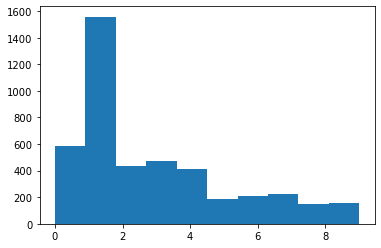

In [4]:
# Check for value counts and distribution of data

print(df['NumCompaniesWorked'].value_counts())
plt.hist(x = 'NumCompaniesWorked',data = df);

In [5]:
# Imputation with median because of the data being skewed

df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].median(),inplace = True)
print(df['NumCompaniesWorked'].value_counts())

1.0    1558
0.0     586
3.0     474
2.0     457
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: NumCompaniesWorked, dtype: int64


3.0    1350
4.0    1334
2.0     856
1.0     845
Name: EnvironmentSatisfaction, dtype: int64


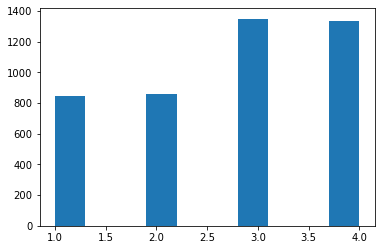

In [6]:
# Check for value counts and distribution of data

print(df['EnvironmentSatisfaction'].value_counts())
plt.hist(x = 'EnvironmentSatisfaction',data = df);

In [7]:
# Imputation with mode because of the data being categorical

df['EnvironmentSatisfaction'].fillna(df['EnvironmentSatisfaction'].mode()[0],inplace = True)
print(df['EnvironmentSatisfaction'].value_counts())

3.0    1375
4.0    1334
2.0     856
1.0     845
Name: EnvironmentSatisfaction, dtype: int64


4.0    1367
3.0    1323
1.0     860
2.0     840
Name: JobSatisfaction, dtype: int64


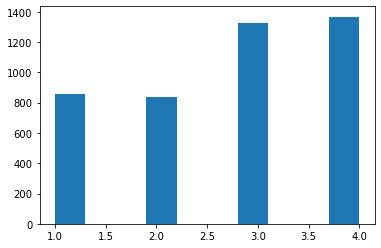

In [8]:
# Check for value counts and distribution of data


print(df['JobSatisfaction'].value_counts())
plt.hist(x = 'JobSatisfaction',data = df);

In [9]:
# Imputation with median because of the data being categorical


df['JobSatisfaction'].fillna(df['JobSatisfaction'].mode()[0],inplace = True)
print(df['JobSatisfaction'].value_counts())

4.0    1387
3.0    1323
1.0     860
2.0     840
Name: JobSatisfaction, dtype: int64


3.0    2660
2.0    1019
4.0     454
1.0     239
Name: WorkLifeBalance, dtype: int64


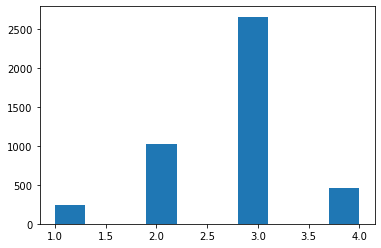

In [10]:
# Check for value counts and distribution of data


print(df['WorkLifeBalance'].value_counts())
plt.hist(x = 'WorkLifeBalance',data = df);

In [11]:
# Null imputation with mean because the data is normally distributed

df['WorkLifeBalance'].fillna(df['WorkLifeBalance'].mode()[0],inplace = True)
print(df['WorkLifeBalance'].value_counts())

3.0    2698
2.0    1019
4.0     454
1.0     239
Name: WorkLifeBalance, dtype: int64


In [13]:
df.to_csv('~/Downloads/attritiondata_edited.csv')